d:\software\Aconda\envs\env\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
C:\Users\13122\AppData\Local\Temp\ipykernel_18344\448722540.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

280.997 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.6s


211.707 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.0s


208.248 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.9s


207.900 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.0s


207.728 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.9s


207.728 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.9s


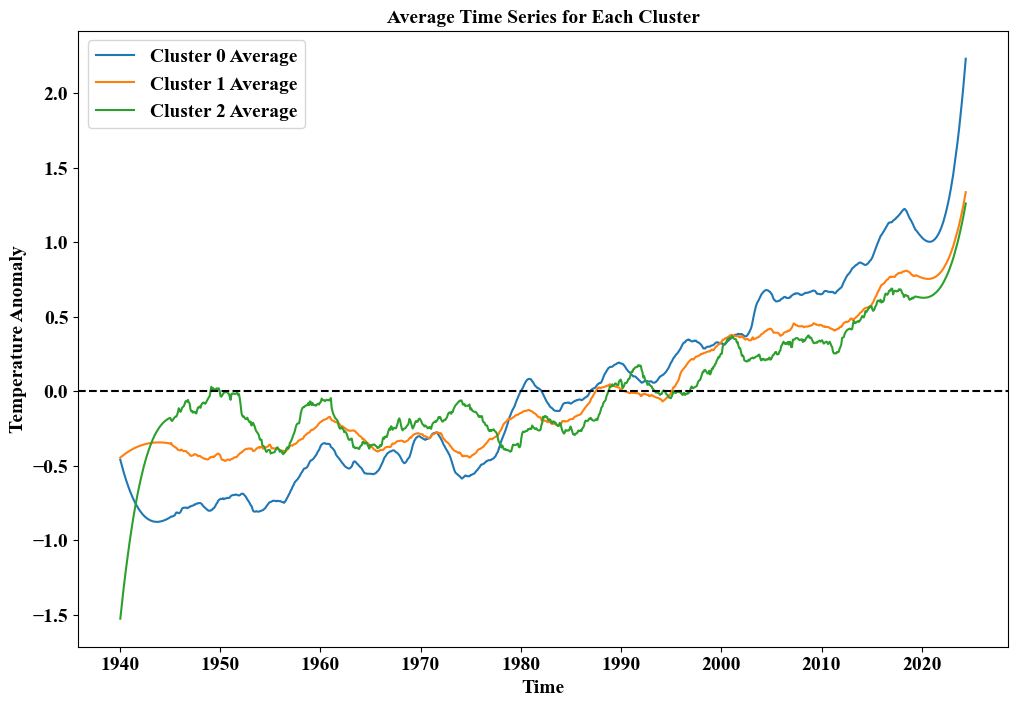

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from matplotlib.font_manager import FontProperties

# 读取数据
df = pd.read_csv('monthly-temperature-anomalies.csv')

# 转换日期格式
df['Day'] = pd.to_datetime(df['Day'], format='%Y/%m/%d')

# 创建一个pivot table，将温度异常数据转换为时间序列格式
pivot_df = df.pivot(index='Day', columns='Code', values='Temperature anomaly')

# 填充缺失值
pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')

# 转换为numpy数组，准备聚类
data = pivot_df.T.values

# 标准化数据
scaler = TimeSeriesScalerMeanVariance()
data_scaled = scaler.fit_transform(data.reshape(-1, pivot_df.shape[0], 1))

# 使用Dtw-KMeans进行聚类
num_clusters = 3  # 假设分成3个簇，可以调整
dba_km = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", verbose=True, random_state=42)
clusters = dba_km.fit_predict(data_scaled)

# 将聚类结果添加到DataFrame
cluster_df = pd.DataFrame({'Code': pivot_df.columns, 'Cluster': clusters})

# 计算每个簇的平均时间序列
average_time_series = np.zeros((num_clusters, pivot_df.shape[0]))

for cluster in range(num_clusters):
    cluster_data = data_scaled[clusters == cluster]
    average_time_series[cluster] = cluster_data.mean(axis=0).flatten()

# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

# 可视化每个簇的平均时间序列
plt.figure(figsize=(12, 8))

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=120, polyorder=3)
    plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Average Time Series for Each Cluster', fontproperties=font_properties)
plt.xlabel('Time', fontproperties=font_properties)
plt.ylabel('Temperature Anomaly', fontproperties=font_properties)
plt.legend(prop=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 保存图像
plt.savefig('Average_Time_Series_for_Each_Cluster.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()


C:\Users\13122\AppData\Local\Temp\ipykernel_18344\2607060003.py:47: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


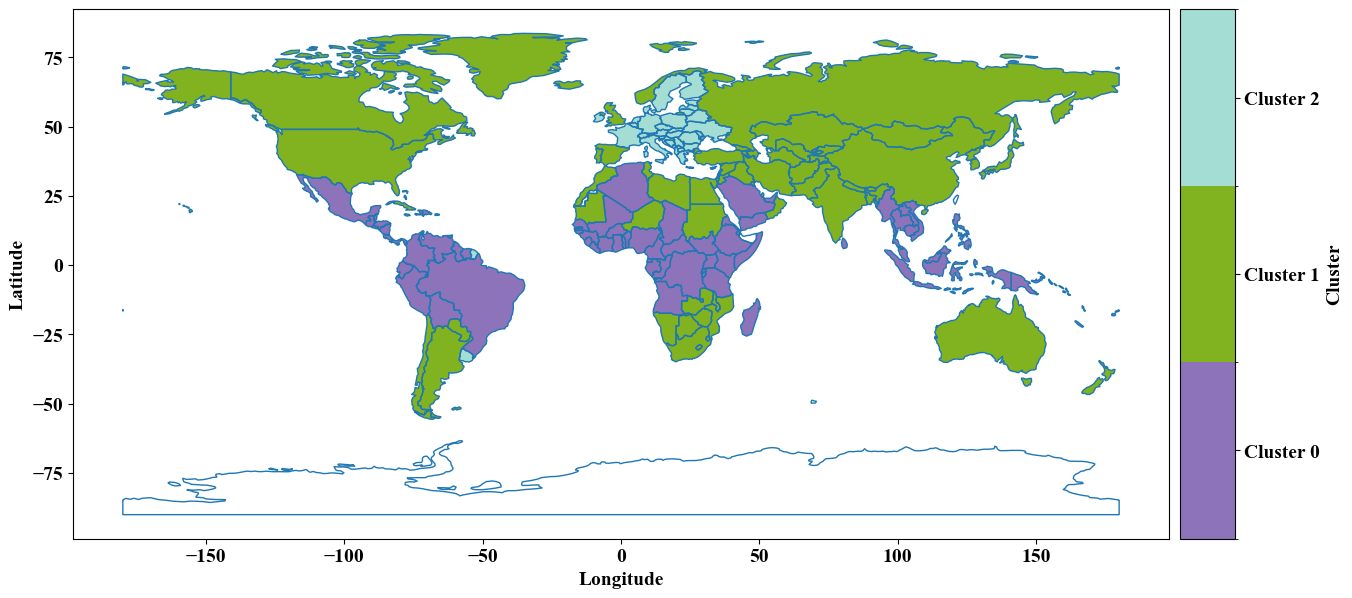

In [2]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# from tslearn.clustering import TimeSeriesKMeans

# # 读取世界地图数据
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # 合并聚类结果和世界地图数据
# world = world.rename(columns={'iso_a3': 'Code'})
# world = world.merge(cluster_df, on='Code', how='left')

# # # 设置颜色映射
# # cmap = plt.get_cmap('tab20')  # 使用离散的colormap，例如'tab20'
# # colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]
# colors = ['#8D73BA', '#81B21F', '#A4DDD3']

# # 绘制地图
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# world.boundary.plot(ax=ax)

# # # 为每个簇设置不同颜色
# # for cluster in range(num_clusters):
# #     world[world['Cluster'] == cluster].plot(color=colors[cluster], ax=ax, label=f'Cluster {cluster}')

# for cluster, color in zip(range(num_clusters), colors):
#     world[world['Cluster'] == cluster].plot(color=color, ax=ax, label=f'Cluster {cluster}')

# plt.title('World Map of Temperature Anomaly Clusters')
# plt.legend()
# plt.show()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

# 读取世界地图数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 合并聚类结果和世界地图数据
world = world.rename(columns={'iso_a3': 'Code'})
world = world.merge(cluster_df, on='Code', how='left')

# 设置颜色映射
colors = ['#8D73BA', '#81B21F', '#A4DDD3']
num_clusters = len(colors)
cmap = ListedColormap(colors[:num_clusters])
norm = BoundaryNorm(range(num_clusters + 1), cmap.N)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 绘制每个簇的国家
for cluster, color in zip(range(num_clusters), colors):
    world[world['Cluster'] == cluster].plot(color=color, ax=ax, label=f'Cluster {cluster}')

# 绘制边界
world.boundary.plot(ax=ax, linewidth=1)

# 设置标题和标签
plt.xlabel('Longitude', fontproperties=font_properties)
plt.ylabel('Latitude', fontproperties=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 使用 make_axes_locatable 创建颜色条并使其与图等高且稍微宽一点
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_ticks([0.5, 1.5, 2.5])
cbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
# 设置颜色条刻度字体属性
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

cbar.ax.tick_params(labelsize=14)
cbar.set_label('Cluster', fontproperties=font_properties)

# 保存图像
plt.savefig('World Map of Temperature Anomaly Clusters.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()



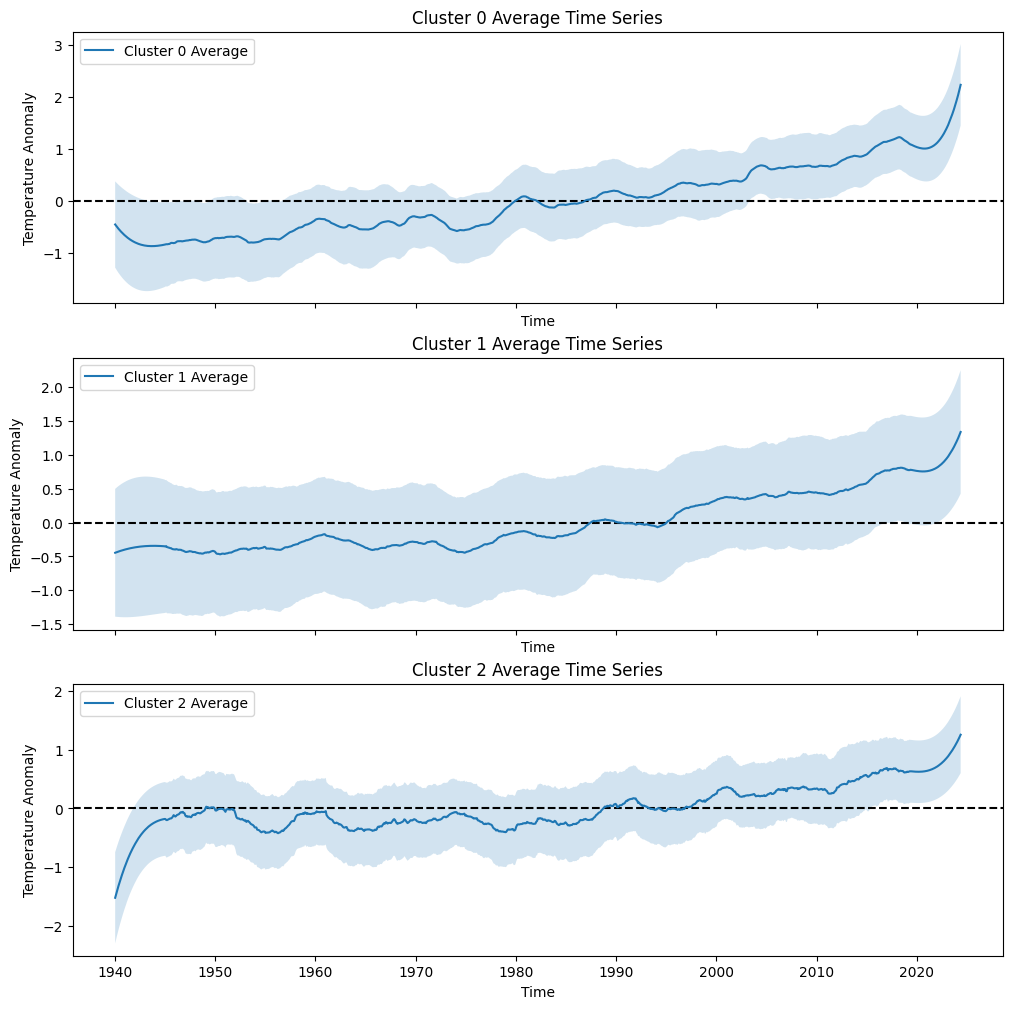

In [3]:
# 计算每个簇的平均时间序列和标准差
average_time_series = np.zeros((num_clusters, pivot_df.shape[0]))
std_time_series = np.zeros((num_clusters, pivot_df.shape[0]))

for cluster in range(num_clusters):
    cluster_data = data_scaled[clusters == cluster]
    average_time_series[cluster] = cluster_data.mean(axis=0).flatten()
    std_time_series[cluster] = cluster_data.std(axis=0).flatten()
    

# 可视化每个簇的平均时间序列和标准差带
fig, axes = plt.subplots(num_clusters, 1, figsize=(12, num_clusters * 4), sharex=True)

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=120, polyorder=3)
    smoothed_std = savgol_filter(std_time_series[cluster], window_length=120, polyorder=3)
    
    axes[cluster].axhline(0, color='black', linestyle='--')
    axes[cluster].plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
    axes[cluster].fill_between(pivot_df.index, smoothed_series - smoothed_std, smoothed_series + smoothed_std, alpha=0.2)
    axes[cluster].set_title(f'Cluster {cluster} Average Time Series')
    axes[cluster].set_xlabel('Time')
    axes[cluster].set_ylabel('Temperature Anomaly')
    axes[cluster].legend()

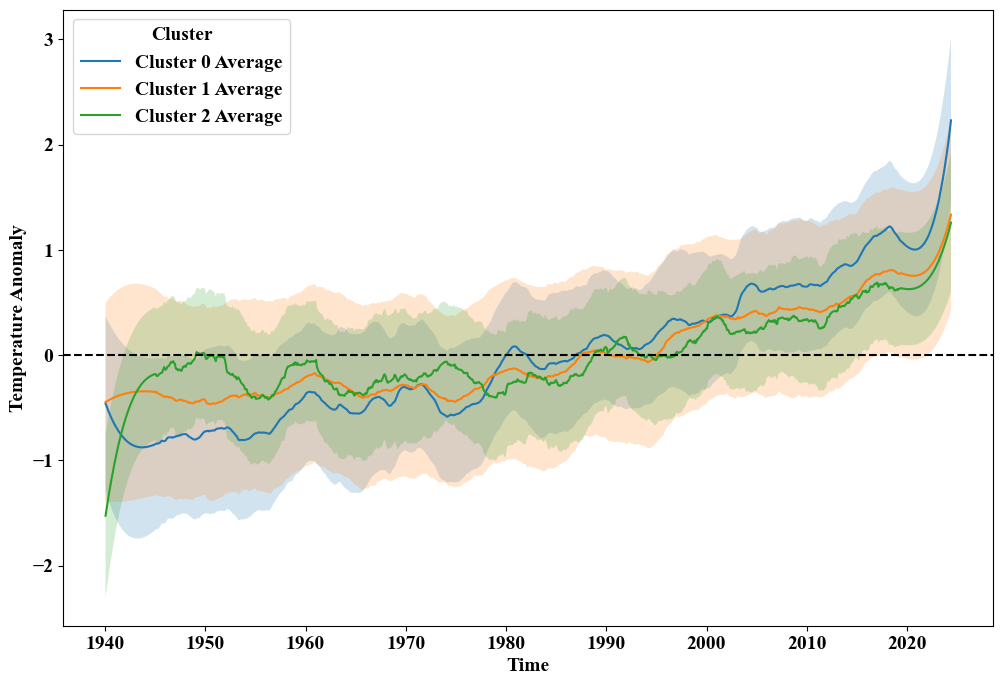

In [4]:
# plt.figure(figsize=(12, 8))

# for cluster in range(num_clusters):
#     # 平滑处理
#     smoothed_series = savgol_filter(average_time_series[cluster], window_length=120, polyorder=3)
#     smoothed_std = savgol_filter(std_time_series[cluster], window_length=120, polyorder=3)
    
#     plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
#     plt.fill_between(pivot_df.index, smoothed_series - smoothed_std, smoothed_series + smoothed_std, alpha=0.2)

# plt.axhline(y=0, color='black', linestyle='--')
# plt.title('Average Time Series for Each Cluster with Standard Deviation Bands')
# plt.xlabel('Time')
# plt.ylabel('Temperature Anomaly')
# plt.legend()
# plt.show()
# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

# 可视化每个簇的平均时间序列和标准差范围带
plt.figure(figsize=(12, 8))

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=120, polyorder=3)
    smoothed_std = savgol_filter(std_time_series[cluster], window_length=120, polyorder=3)
    
    plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
    plt.fill_between(pivot_df.index, smoothed_series - smoothed_std, smoothed_series + smoothed_std, alpha=0.2)

plt.axhline(y=0, color='black', linestyle='--')

#plt.title('Average Time Series for Each Cluster with Standard Deviation Bands', fontproperties=font_properties)
plt.xlabel('Time', fontproperties=font_properties)
plt.ylabel('Temperature Anomaly', fontproperties=font_properties)
plt.legend(prop=font_properties, title='Cluster', title_fontproperties=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 保存图像
plt.savefig('Average Time Series for Each Cluster with Standard Deviation Bands-tep.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()




In [ ]:
# # 可视化每个簇的平均时间序列
# for cluster in range(num_clusters):
#     plt.figure()
#     for code in cluster_df[cluster_df['Cluster'] == cluster]['Code']:
#         plt.plot(pivot_df.index, pivot_df[code], label=code)
#     smoothed_series = savgol_filter(average_time_series[cluster], window_length=144, polyorder=3)
#     plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
#     plt.title(f'Cluster {cluster} Average Time Series')
#     plt.xlabel('Time')
#     plt.ylabel('Temperature Anomaly')
#     plt.legend()
#     plt.show()


### 碳排放 DTW-KMeans

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#  删除 World,OWID_WRL 数据
df = pd.read_csv('per-capita-ghg-emissions.csv')

df = df.dropna(subset=['Code'])
df = df[df['Code'] != 'OWID_WRL']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33535 entries, 0 to 35610
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity                                                  33535 non-null  object 
 1   Code                                                    33535 non-null  object 
 2   Year                                                    33535 non-null  int64  
 3   Per-capita greenhouse gas emissions in CO₂ equivalents  33535 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# 创建一个pivot table，将温度异常数据转换为时间序列格式
pivot_df = df.pivot(index='Year', columns='Code', values='Per-capita greenhouse gas emissions in CO₂ equivalents')
pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 1850-01-01 to 2022-01-01
Columns: 196 entries, AFG to ZWE
dtypes: float64(196)
memory usage: 266.3 KB


C:\Users\13122\AppData\Local\Temp\ipykernel_18344\796483212.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')


In [7]:
# 转换为numpy数组，准备聚类
data = pivot_df.T.values

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


34.352 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


16.754 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


16.021 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.691 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.633 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.554 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.508 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.498 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.483 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.449 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.449 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


15.449 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


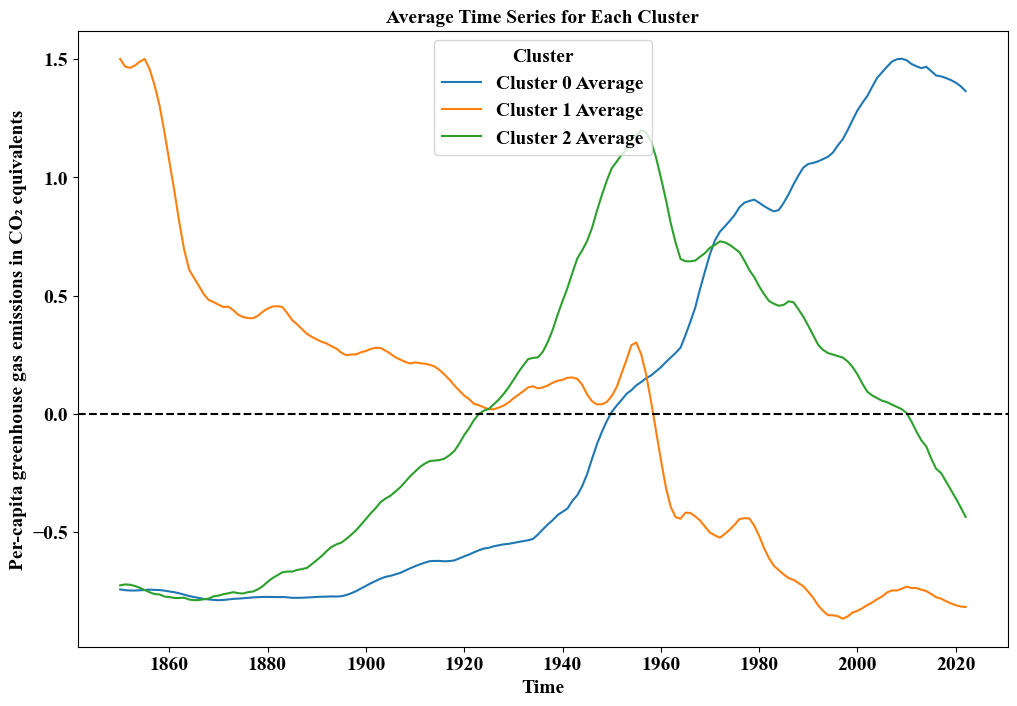

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans


# 标准化数据
scaler = TimeSeriesScalerMeanVariance()
data_scaled = scaler.fit_transform(data.reshape(-1, pivot_df.shape[0], 1))

# 使用DBA-KMeans进行聚类
num_clusters = 3  # 假设分成3个簇，可以调整
dba_km = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", verbose=True, random_state=42)
clusters = dba_km.fit_predict(data_scaled)

# 将聚类结果添加到DataFrame
cluster_df = pd.DataFrame({'Code': pivot_df.columns, 'Cluster': clusters})

# 计算每个簇的平均时间序列
average_time_series = np.zeros((num_clusters, pivot_df.shape[0]))

for cluster in range(num_clusters):
    cluster_data = data_scaled[clusters == cluster]
    average_time_series[cluster] = cluster_data.mean(axis=0).flatten()

# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

# 可视化每个簇的平均时间序列
plt.figure(figsize=(12, 8))

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=12, polyorder=3)
    plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
    
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Average Time Series for Each Cluster', fontproperties=font_properties)
plt.xlabel('Time', fontproperties=font_properties)
plt.ylabel('Per-capita greenhouse gas emissions in CO₂ equivalents', fontproperties=font_properties)
plt.legend(prop=font_properties, title='Cluster', title_fontproperties=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 保存图像
plt.savefig('Average_Time_Series_for_Each_Cluster.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()

C:\Users\13122\AppData\Local\Temp\ipykernel_18344\1292641200.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


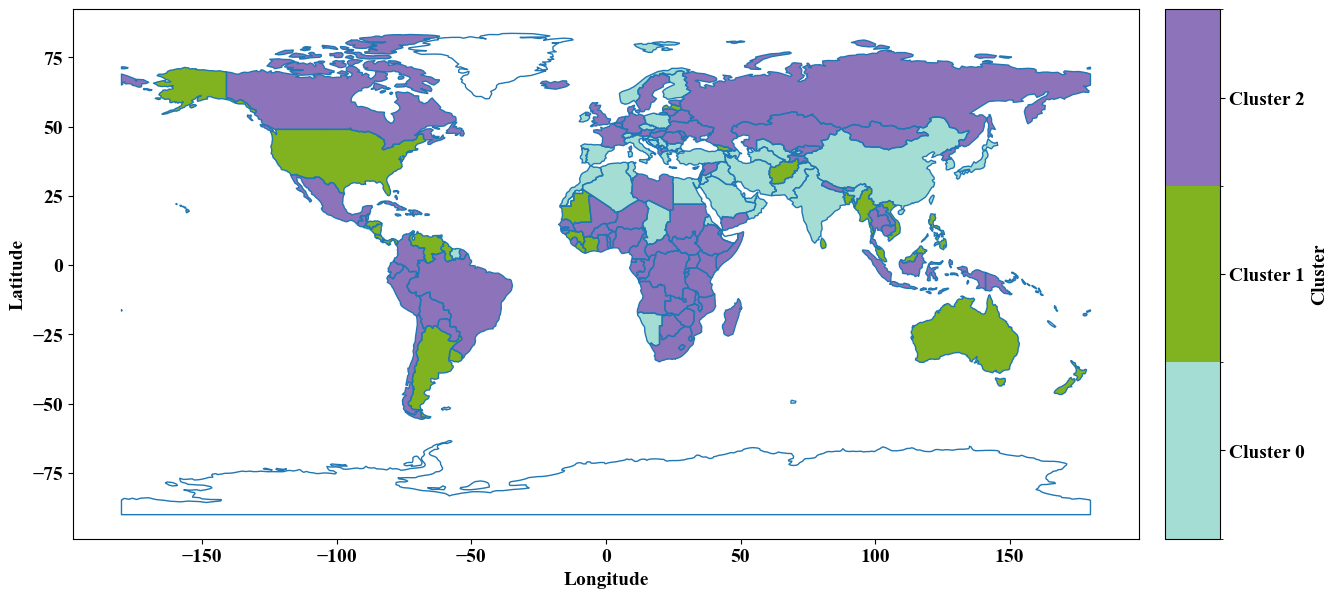

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

# 读取世界地图数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 合并聚类结果和世界地图数据
world = world.rename(columns={'iso_a3': 'Code'})
world = world.merge(cluster_df, on='Code', how='left')

# 设置颜色映射
colors = ['#A4DDD3', '#81B21F', '#8D73BA']
cmap = ListedColormap(colors[:num_clusters])

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 绘制边界
world.boundary.plot(ax=ax, linewidth=1)

# 绘制每个簇的国家
for cluster, color in zip(range(num_clusters), colors):
    world[world['Cluster'] == cluster].plot(color=color, ax=ax, label=f'Cluster {cluster}')

# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

# 设置标题和标签
#plt.title('World Map of Per-capita Greenhouse Gas Emissions in CO₂ Equivalents Clusters', fontproperties=font_properties)
plt.xlabel('Longitude', fontproperties=font_properties)
plt.ylabel('Latitude', fontproperties=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 使用 make_axes_locatable 创建颜色条并使其与图等高且稍微宽一点
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_ticks([0.5, 1.5, 2.5])
cbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
# 设置颜色条刻度字体属性
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

cbar.ax.tick_params(labelsize=14)
cbar.set_label('Cluster', fontproperties=font_properties)

# 保存图像
plt.savefig('World_Map_of_GHG_Emissions_Clusters.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()


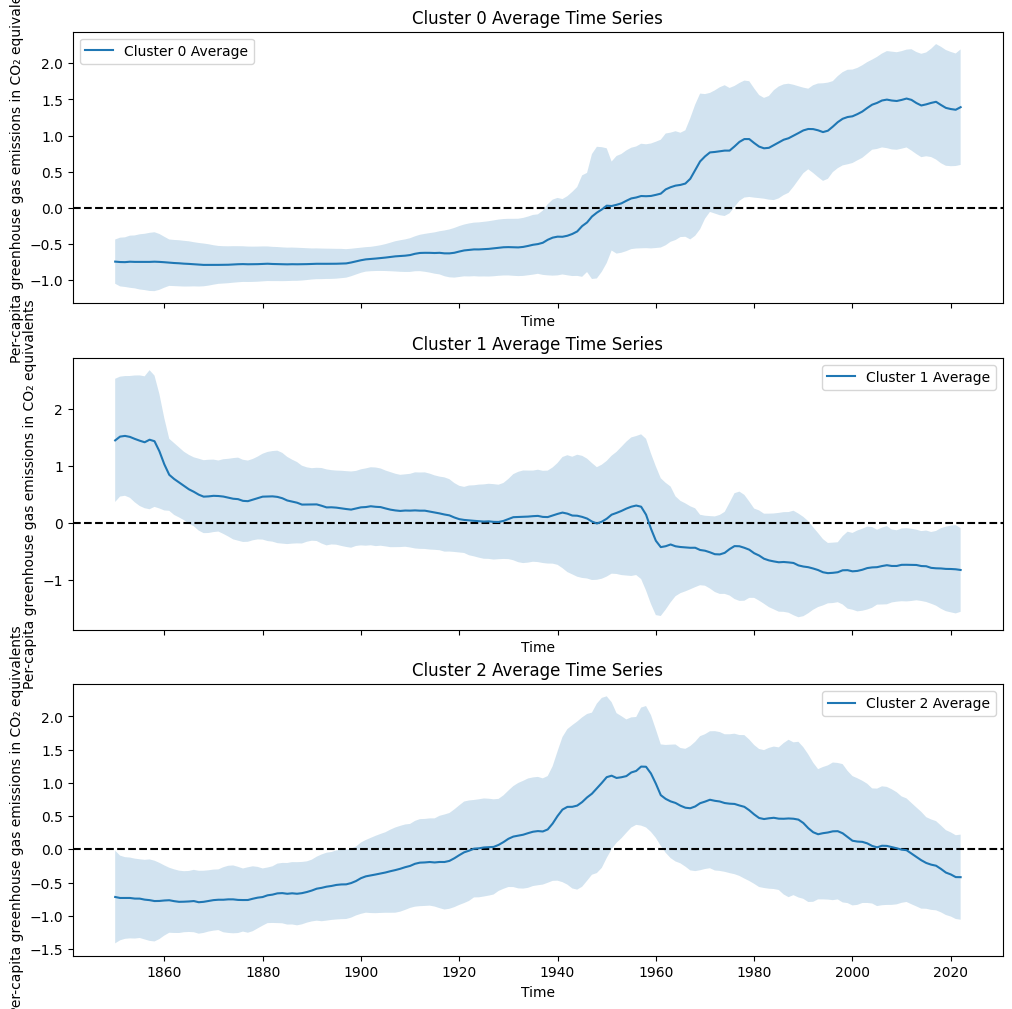

In [10]:
# 计算每个簇的平均时间序列和标准差
average_time_series = np.zeros((num_clusters, pivot_df.shape[0]))
std_time_series = np.zeros((num_clusters, pivot_df.shape[0]))

for cluster in range(num_clusters):
    cluster_data = data_scaled[clusters == cluster]
    average_time_series[cluster] = cluster_data.mean(axis=0).flatten()
    std_time_series[cluster] = cluster_data.std(axis=0).flatten()
    

# 可视化每个簇的平均时间序列和标准差带
fig, axes = plt.subplots(num_clusters, 1, figsize=(12, num_clusters * 4), sharex=True)

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=6, polyorder=3)
    smoothed_std = savgol_filter(std_time_series[cluster], window_length=6, polyorder=3)
    
    axes[cluster].axhline(0, color='black', linestyle='--')
    axes[cluster].plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
    axes[cluster].fill_between(pivot_df.index, smoothed_series - smoothed_std, smoothed_series + smoothed_std, alpha=0.2)
    axes[cluster].set_title(f'Cluster {cluster} Average Time Series')
    axes[cluster].set_xlabel('Time')
    axes[cluster].set_ylabel('Per-capita greenhouse gas emissions in CO₂ equivalents')
    axes[cluster].legend()

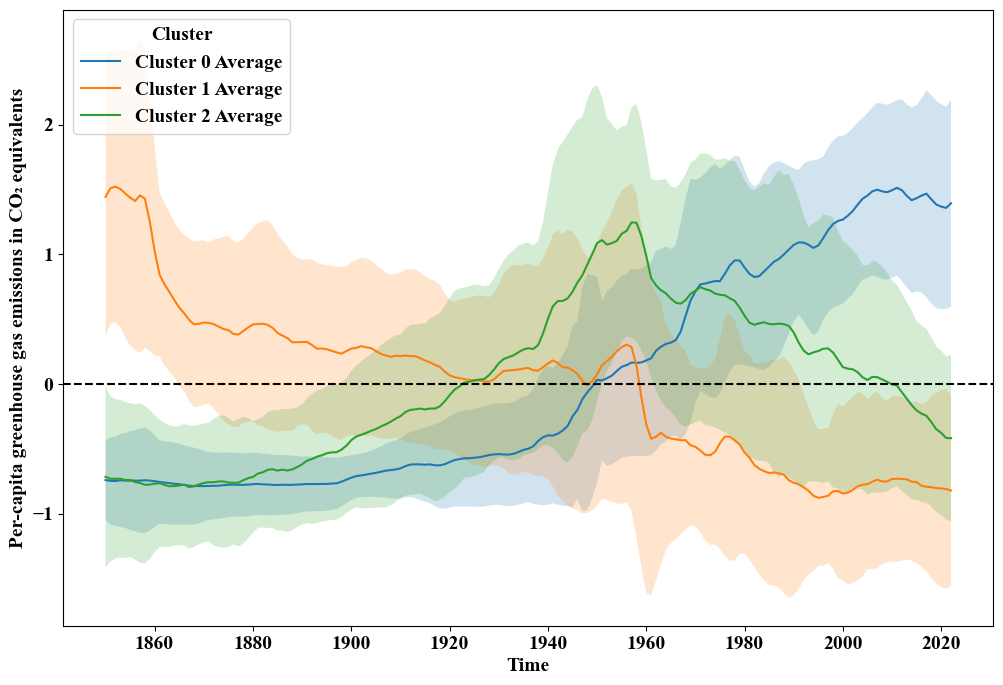

In [11]:
# 设置字体属性
font_properties = FontProperties(family='Times New Roman', weight='bold', size=14)

plt.figure(figsize=(12, 8))

for cluster in range(num_clusters):
    # 平滑处理
    smoothed_series = savgol_filter(average_time_series[cluster], window_length=6, polyorder=3)
    smoothed_std = savgol_filter(std_time_series[cluster], window_length=6, polyorder=3)
    
    plt.plot(pivot_df.index, smoothed_series, label=f'Cluster {cluster} Average')
    plt.fill_between(pivot_df.index, smoothed_series - smoothed_std, smoothed_series + smoothed_std, alpha=0.2)

plt.axhline(y=0, color='black', linestyle='--')

#plt.title('Average Time Series for Each Cluster with Standard Deviation Bands', fontproperties=font_properties)
plt.xlabel('Time', fontproperties=font_properties)
plt.ylabel('Per-capita greenhouse gas emissions in CO₂ equivalents', fontproperties=font_properties)
plt.legend(prop=font_properties, title='Cluster', title_fontproperties=font_properties)

# 设置刻度字体属性
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)

# 保存图像
plt.savefig('Average_Time_Series_for_Each_Cluster_with_Std_Bands-c.jpg', dpi=800, bbox_inches='tight')

# 显示图像
plt.show()